In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [2]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')

In [3]:
df.sample(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2243,3244,16,1,3,4,10.349220,15,0,3,1,1,0,1,2.192415,4.0
17,1018,18,1,0,0,3.528238,16,1,2,0,0,0,0,1.384404,4.0
1554,2555,18,0,1,2,3.521786,22,0,4,0,0,0,0,0.935779,4.0
239,1240,18,0,2,2,10.868117,16,0,1,1,0,1,0,1.597017,4.0
619,1620,17,1,0,1,0.014337,19,0,3,1,0,0,0,1.383528,4.0
475,1476,18,1,2,3,2.949060,2,1,3,0,1,0,1,3.143910,1.0
1629,2630,16,0,0,1,16.827135,17,1,3,0,0,1,0,2.127589,3.0
1760,2761,18,0,2,2,1.760121,14,0,2,0,0,0,0,1.567412,4.0
773,1774,18,0,0,2,5.577439,19,0,4,1,0,0,0,1.591348,4.0
486,1487,17,0,1,1,15.557554,15,1,2,1,0,0,0,2.222003,3.0


In [4]:
df.shape

(2392, 15)

In [5]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df['Age'].max()

18

In [8]:
df['Age'].min()

15

In [9]:
(df['Gender'] == 0).sum()

1170

In [10]:
(df['Gender'] == 1).sum()

1222

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

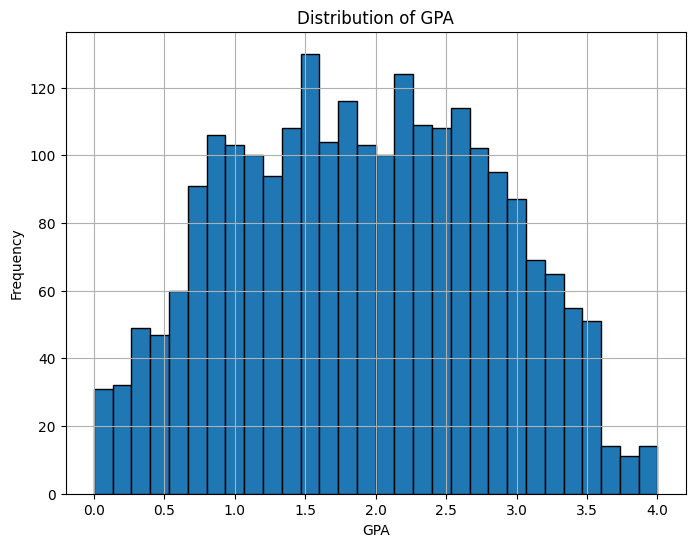

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['GPA'], bins=30, edgecolor='black')  
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.grid(True)
plt.show()

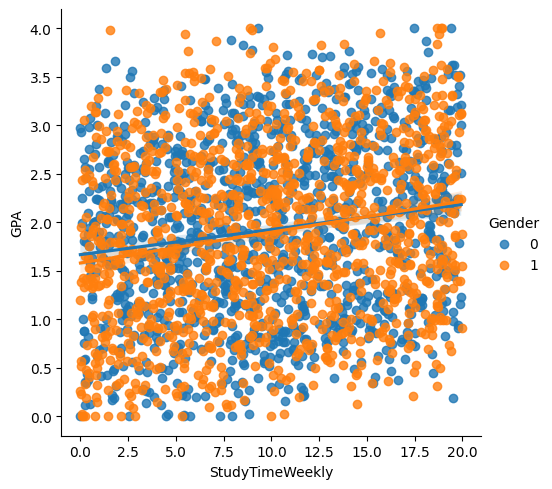

In [13]:
sns.lmplot(x="StudyTimeWeekly", y="GPA", hue="Gender", data=df)

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

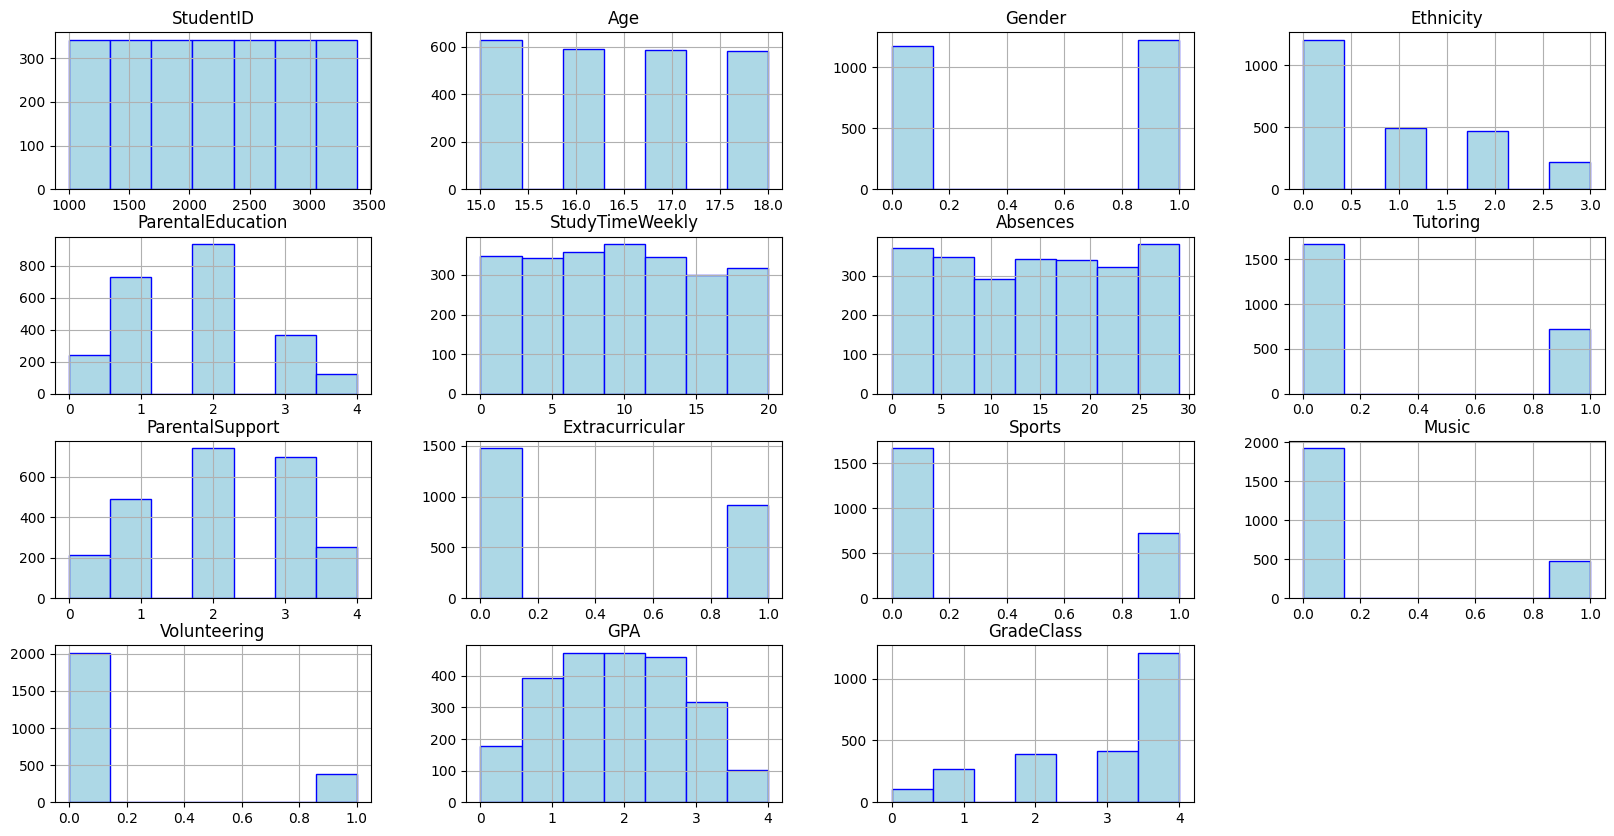

In [14]:
df.hist(figsize=(20,10),bins=7, color='lightblue', edgecolor='blue')

## Quick Observations

- **StudentID** lacks a distribution and logically would not impact the Grade.
- **Age** appears as a categorical feature, with only four distinct values in the dataset.
- There are only four distinct **ethnicity** categories in the dataset.
- A significant portion of students have low scores, with a majority falling into the GradeClass of 4s (Fs).

## Steps to Assess Feature Importance

1. Identify which columns are numeric and which are categorical.
2. Encode the categorical columns to convert object variables into numerical values.
3. Scale the numerical columns to ensure that both large and small numbers have an equal influence on the model.


In [15]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for col in columns:
    unique_vals = df[col].unique()
    if df[col].dtype in ['int64', 'float64'] and len(unique_vals) > 5:
        numeric_columns.append(col)
    else:
        categoric_columns.append(col)

In [16]:
# Remove the first column if it's an ID or non-numeric feature
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:  
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])